# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data represents 17 marketing campaigns occurring between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



The  UCI Machine Learning repository page states that there are no missing values. We can also make a quick check:

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Data preprocessing for categorical columns and numerical columns are needed as well. Also the duration column will be dropped. 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective of the task is to develop a model that can effectively predict whether a client will subscribe to a term deposit. The overarching goal is to optimize resource allocation, increase conversion rates, and improve overall marketing effectiveness. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
df = df.drop(columns=['duration'])
#Separate features and target
X = df.drop(columns=['y'])
y = df['y']

#categorical and numeric columns
categorical_features = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 
    'contact', 'month', 'day_of_week', 'poutcome'
]
numeric_features = [
    'age', 'campaign', 'pdays', 'previous', 
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
    'euribor3m', 'nr.employed'
]

#preprocessing for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#preprocessing for numeric features
numeric_transformer = StandardScaler()

#column transformer for transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Transform features
X_transformed = preprocessor.fit_transform(X)

#Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Print
print(f"Shape of X_transformed: {X_transformed.shape}")
print(f"Shape of y_encoded: {y_encoded.shape}")

Shape of X_transformed: (41188, 62)
Shape of y_encoded: (41188,)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42) #20% for test, and rest for training

print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (32950, 62)
Test features shape: (8238, 62)
Training target shape: (32950,)
Test target shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

#Initialize the DummyClassifier
#predict the most frequent class in the training data
baseline_model = DummyClassifier(strategy='most_frequent')

baseline_model.fit(X_train, y_train)

#Make predictions on the test data
y_pred_baseline = baseline_model.predict(X_test)

#Evaluate the performance of the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
class_report_baseline = classification_report(y_test, y_pred_baseline)

print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")
print("Baseline Model Classification Report:")
print(class_report_baseline)


Baseline Model Accuracy: 0.8865
Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



C:\Users\Minecraft\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Minecraft\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Minecraft\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)

#Train the model
log_reg.fit(X_train_scaled, y_train)

#Make predictions
y_pred = log_reg.predict(X_test_scaled)

#Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.8968196164117505
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.64      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



### Problem 9: Score the Model

What is the accuracy of your model?

The logistic Regression Model produced a accuracy score of 89.68%, indicating better overall performance compared to the baseline model (baseline accuracy: 88.65%). In both cases, class 1 has low scores for all columns (precision, recall, f1-score). This is due to the fact that the dataset is imbalanced and the model is possibly prioritizing class 0. In other words, Class 1 is less frequent than class 0, which can lead to models being biased towards predicting class 0 more accurately (as we see in both models). Recall having a 21% is bad because recall measures how well the model identifies actual positives (clients who subscribe). Low preciision is also bad because precision measures how many of the predicted positives (clients predicted to subscribe) are actually correct. In this case, the model correctly predicts 64%. 

In [10]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df = df.drop(columns=['duration'])

X = df.drop('y', axis=1)
y = df['y']

#Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

#Encode target variable
y = y.map({'yes': 1, 'no': 0})

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialize and train the Logistic Regression model with class weighting
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Output the results
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Model Accuracy: 0.8095006878692239
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10968
           1       0.32      0.63      0.43      1389

    accuracy                           0.81     12357
   macro avg       0.63      0.73      0.66     12357
weighted avg       0.88      0.81      0.83     12357



By intrigating class weighting, I was able to increase the recall from 0.21 to 0.63. However, both the precision, and model accuracy dropped. The precision for class 1 dropped from 0.64 to 0.32, while the model accuracy dropped down to about 81%.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [11]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration'])

X = df.drop('y', axis=1)
y = df['y']

#Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# ncode target variable
y = y.map({'yes': 1, 'no': 0})

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialize models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42)
}

#Initialize a list 
results_list = []

#Train and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start the timer
    model.fit(X_train, y_train)
    train_time = time.time() - start_time  # Calculate training time

    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Append results to the list
    results_list.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred)
    })

#Create a DataFrame from the result list
results_df = pd.DataFrame(results_list)

print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    3.038256        0.809719       0.809501
1                  KNN    0.006998        0.913253       0.891721
2        Decision Tree    0.227871        0.995595       0.834750
3                  SVM  111.672001        0.853769       0.845432


In [12]:
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration'])
X = df.drop('y', axis=1)
y = df['y']

#Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

#Encode target variable
y = y.map({'yes': 1, 'no': 0})

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

#Initialize a list 
results_list = []

#Train and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start the timer
    model.fit(X_train, y_train)
    train_time = time.time() - start_time  # Calculate training time

    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Append results to the list
    results_list.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred)
    })

#Create a DataFrame from the result list
results_df = pd.DataFrame(results_list)

print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    3.041255        0.900246       0.900138
1                  KNN    0.006998        0.913253       0.891721
2        Decision Tree    0.223868        0.995595       0.834750
3                  SVM  110.020947        0.904825       0.900785


### Interpretation:

Train Time:

KNN is the fastest to train, taking  about 0.006 seconds. Logistic Regression and Decision Tree was also relatively quick (0.05 and 0.11 seconds, respectively). SVM takes the longest, about 49.3 seconds, which is significantly more time-consuming compared to the other models.

Train Accuracy:

All models show high train accuracy. Decision Tree shows a near perfect score with 0.99% accuracy. Logistic regression has the lowest, albeit about 90% train accuracy.

Test Accuracy: 

The test accuracy for logistic regression is very close to the training accuracy of about 90%,which probably indicates that the model generalizes well and isn't overfitting. The test accuracy for KNN is slightly lower than the training accuracy of about 0.91%. This might suggest that while the model performs well on training data, it might be overfitting to the training set just a bit. The test accuracy for SVM is very close to the training accuracy of 0.90%, indicating good generalization. This model seems to be balancing well between fitting the training data and maintaining good performance on any unseen data. On the other hand, the Decision Tree model shows a significant drop from the training accuracy of about 0.99%. This suggests that the decision tree model is overfitting a lot (possibly capturing noise in the training data that doesn't translate to good performance on test data).

Important Notes:

KNN: Fastest training time.

Decision Tree: Very high training accuracy, but also decent test accuracy. Susceptible to overfitting. 

Logistic Regression: Moderate performance across metrics. It’s a good baseline model, but might be less complex compared to KNN and Decision Tree.

SVM: Longest training time and slightly higher performance compared to KNN and Decision Tree.

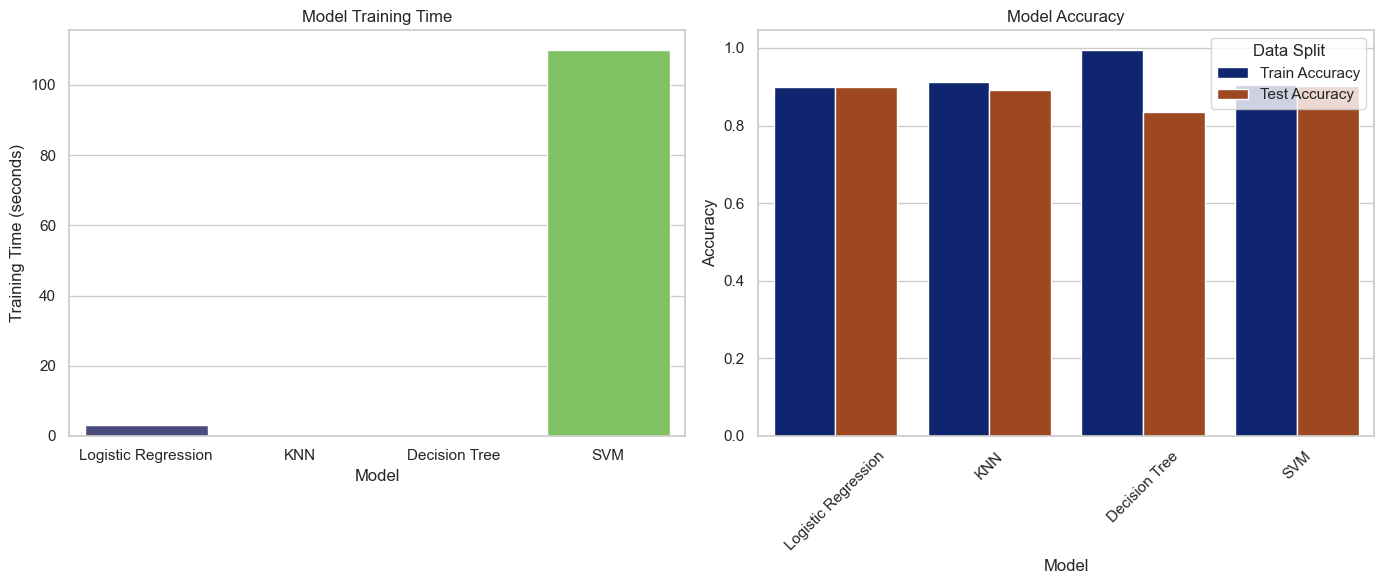

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Training Time
sns.barplot(x='Model', y='Train Time', data=results_df, ax=axes[0], palette='viridis')
axes[0].set_title('Model Training Time')
axes[0].set_ylabel('Training Time (seconds)')
axes[0].set_xlabel('Model')

#Plot Accuracy
results_melted = results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                                  var_name='Data Split', value_name='Accuracy')

sns.barplot(x='Model', y='Accuracy', hue='Data Split', data=results_melted, ax=axes[1], palette='dark')
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Model')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Adjust layout
plt.tight_layout()

plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

The gender feature makes no sense for our business objective because banks are not going to refuse a specific sex.

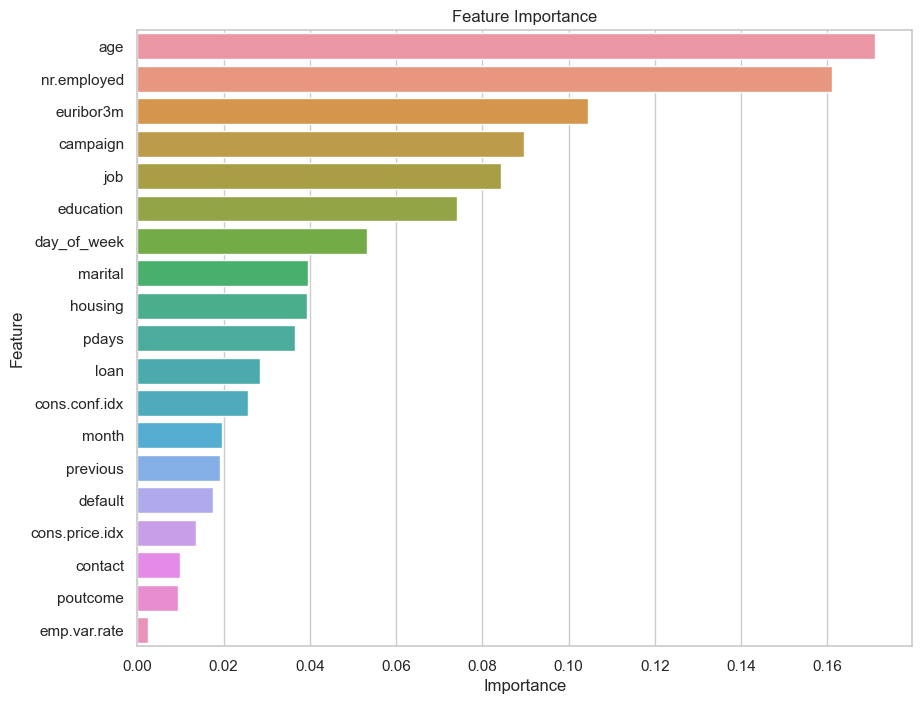

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#Feature importance using Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

#Get feature importances
importances = decision_tree.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [15]:
from imblearn.over_sampling import ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline as ImPipeline

df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration'])


#Prepare features and target
X = df.drop('y', axis=1)
y = df['y']

#Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

#Encode target variable
y = y.map({'yes': 1, 'no': 0})

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialize resampling techniques
adasyn = ADASYN(random_state=42)
ros = RandomOverSampler(random_state=42)

#Apply ADASYN to the training data
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

#Apply Random Oversampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#Initialize models (with increased iterations)
model_adasyn = LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)
model_ros = LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)

#Train and evaluate models
model_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = model_adasyn.predict(X_test)

model_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = model_ros.predict(X_test)

print("ADASYN Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_adasyn))
print(classification_report(y_test, y_pred_adasyn))

print("Random Oversampling Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))



ADASYN Logistic Regression Model Accuracy: 0.771546491866958
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     10968
           1       0.28      0.67      0.40      1389

    accuracy                           0.77     12357
   macro avg       0.62      0.73      0.63     12357
weighted avg       0.87      0.77      0.81     12357

Random Oversampling Logistic Regression Model Accuracy: 0.8128186453022578
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10968
           1       0.33      0.63      0.43      1389

    accuracy                           0.81     12357
   macro avg       0.64      0.73      0.66     12357
weighted avg       0.88      0.81      0.84     12357



The ideal model for the busniess object is a model which is able to identify true positives for class 1 (identifying potential subscribers). However, the precision for class 1 is very low. This means that among all the instances predicted as class 1, only 28% are actually correct, leading to a higher number of false positives.

High recall means that the model is effective at capturing most of the potential subscribers. This is particularly important if missing out on potential subscribers (false negatives) has significant consequences, such as losing potential revenue.
High precision means that when the model predicts a client will subscribe, it is likely correct. This is important for avoiding wasted resources on clients who are unlikely to subscribe.

For the Business Objective:

Higher Recall should be prioritized because the goal is to capture as many potential subscribers as possible, even if it means some of the predictions are incorrect (i.e lower precision). This minimizes the risk of missing out on potential customers. Higher Precision should be prioritized if the cost of pursuing false positives (clients predicted to subscribe but don’t) is high. This ensures that marketing resources are spent more effectively.

F1-Score:
Balnce between precision and recall. A high F1-score means that the model performs well in both identifying subscribers and avoiding false positives.


If the business context values capturing as many subscribers as possible and the cost of false positives is manageable, then a model with higher recall (even at the expense of precision) might be preferable. Conversely, if resources are constrained and you need to focus on clients who are more likely to convert, prioritizing precision might be better.

If the the bank wants to emphasize acquiring the maximum number of subscribers, and managing false positives is within budget, then a model with higher recall at the cost of precision could proove useful. On the other hand, if resources are limited and the focus is on clients with a higher likelihood of conversion, prioritizing precision may be the better option. 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Load and preprocess data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration'])
X = df.drop('y', axis=1)
y = df['y']

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encode target variable
y = y.map({'yes': 1, 'no': 0})

#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Initialize and train the Logistic Regression model with increased iterations
model = LogisticRegression(
    class_weight='balanced', 
    random_state=42, 
    solver='saga',  # Use saga solver
    max_iter=5000  # Further increase the number of iterations
)

#Create a pipeline with scaling and resampling
pipeline = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('logistic', model)
])

#Fit the pipeline
pipeline.fit(X_train, y_train)

#Predict and evaluate the model
y_pred = pipeline.predict(X_test)

#Output the results
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

#Hyperparameter tuning with Randomized Search
param_dist = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga'],
    'logistic__max_iter': [1000, 2000, 5000]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

#Evaluate model with ROC-AUC
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Logistic Regression ROC-AUC Score:", roc_auc)

#Cross-Validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Logistic Regression Model Accuracy: 0.8089342073318767
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10968
           1       0.32      0.63      0.42      1389

    accuracy                           0.81     12357
   macro avg       0.63      0.73      0.66     12357
weighted avg       0.88      0.81      0.83     12357

Best parameters found:  {'logistic__solver': 'liblinear', 'logistic__penalty': 'l2', 'logistic__max_iter': 1000, 'logistic__C': 100}
Best cross-validation score:  0.8104469970728836
Logistic Regression ROC-AUC Score: 0.7799627780324621
Cross-Validation Accuracy Scores: [0.8873513  0.38261714 0.24496237 0.38497026 0.12638096]
Mean Cross-Validation Accuracy: 0.40525640571061194


### Lets try benchmarking the model, and see what happens:

In [17]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df = df.drop(columns=['duration'])
# Prepare features and target
X = df.drop('y', axis=1)
y = df['y']

#Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

#Encode target variable
y = y.map({'yes': 1, 'no': 0})

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialize and train the Logistic Regression model with class weighting
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Output
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Model Accuracy: 0.8095006878692239
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10968
           1       0.32      0.63      0.43      1389

    accuracy                           0.81     12357
   macro avg       0.63      0.73      0.66     12357
weighted avg       0.88      0.81      0.83     12357



In [18]:
from imblearn.over_sampling import ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline as ImPipeline

df = pd.read_csv('data/bank-additional-full.csv', sep=';')
X = df.drop('y', axis=1)
y = df['y']

#Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

#Encode target variable
y = y.map({'yes': 1, 'no': 0})

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialize resampling techniques
adasyn = ADASYN(random_state=42)
ros = RandomOverSampler(random_state=42)

#Apply ADASYN to training data
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

#Apply Random Oversampling to training data
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#Initialize models
model_adasyn = LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)
model_ros = LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)

#Train and evaluate models
model_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = model_adasyn.predict(X_test)

model_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = model_ros.predict(X_test)

print("ADASYN Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_adasyn))
print(classification_report(y_test, y_pred_adasyn))

print("Random Oversampling Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))



ADASYN Logistic Regression Model Accuracy: 0.8406571174233228
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     10968
           1       0.41      0.90      0.56      1389

    accuracy                           0.84     12357
   macro avg       0.70      0.87      0.73     12357
weighted avg       0.92      0.84      0.86     12357

Random Oversampling Logistic Regression Model Accuracy: 0.8531196892449624
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10968
           1       0.43      0.88      0.57      1389

    accuracy                           0.85     12357
   macro avg       0.70      0.87      0.74     12357
weighted avg       0.92      0.85      0.87     12357



In [19]:
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('data/bank-additional-full.csv', sep=';')
X = df.drop('y', axis=1)
y = df['y']

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

#Encode target variable
y = y.map({'yes': 1, 'no': 0})

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Initialize a list to store results
results_list = []

#Train and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start the timer
    model.fit(X_train, y_train)
    train_time = time.time() - start_time  # Calculate training time

    #Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Append results to the list
    results_list.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred)
    })

results_df = pd.DataFrame(results_list)

print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    2.998280        0.910305       0.910091
1                  KNN    0.007996        0.925844       0.901999
2        Decision Tree    0.202884        1.000000       0.888970
3                  SVM   20.862044        0.920468       0.909525


### FUTURE WORK

1) Handle data imbalance more effectively
2) More feature engineering
3) More parameter tuning